# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Aprendizaje No Supervisado: Clustering y Métrica Silhouette**

En este cuaderno, se cubriran los siguientes temas:

### 1. Alta Separación entre Clusters
### 2. Datos con ruido
### 3. Datos con más desviación entre los Clusters
### 4. Superposición entre Clusters
### 5. Conclusiones Generales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Primer Escenario

1. **Generar datos sintéticos con alta separación entre clusters**:
   - Utiliza la función `make_blobs` de scikit-learn para generar un conjunto de datos sintéticos.
   - Configura el número de muestras (`n_samples=300`), el número de clusters (`centers=3`), el número de características (`n_features=2`) y la desviación estándar de los clusters (`cluster_std=1.0`).
   - Asegúrate de establecer `random_state` en un valor fijo para reproducibilidad.

2. **Entrenar un modelo K-Means con K=3**:
   - Utiliza la clase `KMeans` de scikit-learn para inicializar un modelo K-Means con 3 clusters.
   - Ajusta el modelo a los datos generados utilizando el método `fit`.

3. **Calcular el Silhouette Score**:
   - Utiliza la función `silhouette_score` de scikit-learn para calcular el Silhouette Score del modelo ajustado.
   - Proporciona como entrada el conjunto de datos y las etiquetas de cluster asignadas por el modelo.

4. **Visualizar los clusters y los centroides**:
   - Utiliza la función `scatter` de matplotlib para crear un gráfico de dispersión de los datos.
   - Asigna un color diferente a cada cluster utilizando las etiquetas de cluster asignadas por el modelo.
   - Utiliza la función `scatter` nuevamente para visualizar los centroides de los clusters en el mismo gráfico, marcándolos con una 'x' y utilizando un color llamativo, como rojo.

5. **Mostrar el Silhouette Score**:
   - Muestra el valor del Silhouette Score calculado en la salida del cuaderno para que los estudiantes puedan ver la calidad de la agrupación.


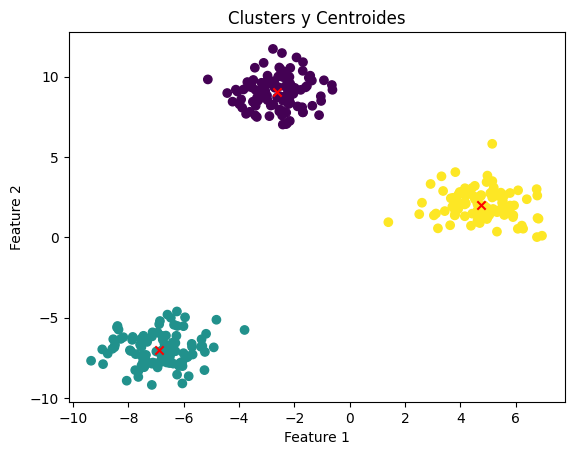

Silhouette Score avg: 0.8480303059596955


In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Paso 1: Generar datos sintéticos con alta separación entre clusters
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42, cluster_std=1.0)

# Entrenar modelo K-Means con K=3
kmeans = KMeans(n_clusters=3, max_iter=200, n_init=20)
kmeans.fit(X)
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
centros = kmeans.cluster_centers_

# Visualizar los clusters y los centroides en un scatter plot
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(centros[:,0], centros[:,1], c='r', marker='x')
plt.title("Clusters y Centroides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Silhouette Score avg:", silhouette_avg)

# 2. Escenario 2

### Generar datos sintéticos con poca superposición de clusters y agregar ruido

   - Utiliza la función `make_blobs` de scikit-learn para generar un conjunto de datos sintéticos con poca superposición entre clusters.
   - Configura la generación de los datos bajo las mismas condiciones anteriores.
   - Asegúrate de establecer `random_state` en un valor fijo para reproducibilidad.
   - Genera un conjunto adicional de datos de ruido utilizando una distribución aleatoria uniforme o normal.
   - Añade estos datos de ruido a los datos de los clusters utilizando una proporción adecuada. Por ejemplo, puedes usar la función `np.random.rand` para generar puntos en un rango específico y luego agregarlos a los datos de los clusters.


In [5]:
# Añadir otros datos aleatorios al dataset (ruido). tip: np.vstack()
noise = np.random.rand(300, 2)*20 -10
X = np.vstack((X, noise))

Silhouette Score avg: 0.569047921974505
El Silhouette Score promedio es: 0.569047921974505


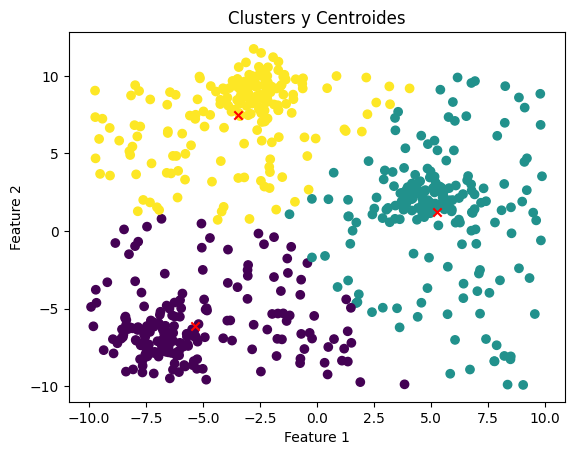

In [6]:
# Entrenar modelo K-Means
kmeans = KMeans(n_clusters=3, max_iter=200, n_init=20)
kmeans.fit(X)

# Calcular las etiquetas de cluster para cada muestra
labels = kmeans.labels_
centros = kmeans.cluster_centers_

#
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("El Silhouette Score promedio es:", silhouette_avg)

# Visualizar los clusters y los centroides
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(centros[:,0], centros[:,1], c='r', marker='x')
plt.title("Clusters y Centroides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. Escenario 3

### Generar datos sintéticos con más desviación en la función 'make_blobs'
   - Utiliza la función `make_blobs` de scikit-learn para generar un conjunto de datos sintéticos con más desviación entre los clusters.
   - Ajusta el parámetro `cluster_std` a un valor mayor que en el Paso 1 para aumentar la dispersión de los clusters.
   - Configura los demás parámetros (n_samples, centers, n_features) de manera similar al Paso 1 para mantener la consistencia en la generación de datos.


In [8]:
# Paso 3: Mas desviación en los datos
X_more_dev, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42, cluster_std=2.5)

# Añadir los datos aleatorios
noise = np.random.rand(300, 2)*20 -10
X_more_dev = np.vstack((X_more_dev, noise))

El Silhouette Score promedio es: 0.4993436540054282


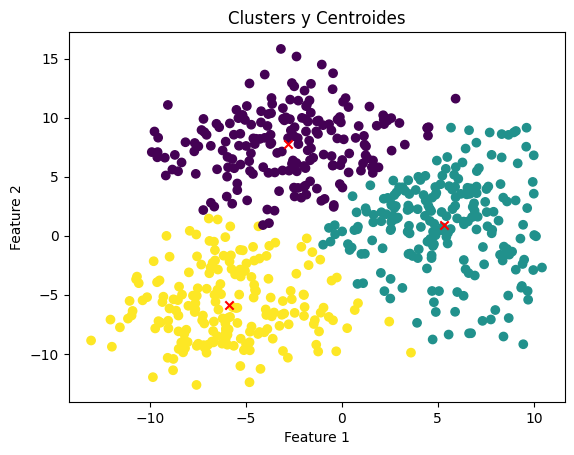

In [19]:
# Entrenar modelo K-Means
kmeans = KMeans(n_clusters=3, max_iter=200, n_init=20)
kmeans.fit(X_more_dev)

# Calcular las etiquetas de cluster para cada muestra
labels = kmeans.labels_
centros = kmeans.cluster_centers_

#
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X_more_dev, labels)

print("El Silhouette Score promedio es:", silhouette_avg)

# Visualizar los clusters y los centroides
plt.scatter(X_more_dev[:,0], X_more_dev[:,1], c=kmeans.labels_)
plt.scatter(centros[:,0], centros[:,1], c='r', marker='x')
plt.title("Clusters y Centroides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 4. Escenario cuatro
### Generar 2 subconjuntos de datos con diferentes densidades y entrenar un modelo con más de tres clusters
   - Utiliza la función `make_blobs` de scikit-learn para generar dos conjuntos de datos sintéticos con diferentes densidades.
   - Ajusta los parámetros `n_samples`, `centers` y `cluster_std` de manera diferente para cada conjunto de datos para crear diferentes densidades.
   - Entrena un modelo K-Means con un número de clusters mayor que tres para forzar la superposición entre los clusters.
   - Ajusta el parámetro `n_clusters` de la clase `KMeans` a un valor mayor que tres.


In [10]:
# Generar clusters con mayor superposición y diferentes densidades
X1, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
X2, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)

# Combinar los dos conjuntos de datos para crear clusters superpuestos y con diferentes densidades
X = np.vstack([X1, X2])

El Silhouette Score promedio es: 0.2894310244848709


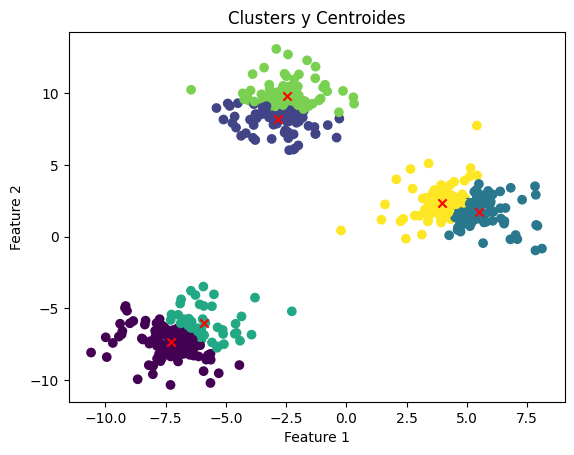

In [16]:
# Entrenar modelo K-Means K=6
kmeans = KMeans(n_clusters=6, max_iter=200, n_init=20)
kmeans.fit(X)

# Calcular las etiquetas de cluster para cada muestra
labels = kmeans.labels_
centros = kmeans.cluster_centers_

#
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("El Silhouette Score promedio es:", silhouette_avg)

# Visualizar los clusters y los centroides
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(centros[:,0], centros[:,1], c='r', marker='x')
plt.title("Clusters y Centroides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 5.Determinación del Valor Óptimo de K en K-means
## Inertia vs Silhouette Score

En este reto, los estudiantes explorarán cómo determinar el valor óptimo de
K en uno de los conjuntos de datos anteriores utilizando el algoritmo de K-means. Se emplearán dos métodos para este fin: el método del codo (elbow method) utilizando la métrica de inertia y el método del coeficiente de silueta (silhouette score).

### Pasos a Seguir

1. **Definir el Rango de \( K \)**:
   - Decide un rango de valores de \( K \) a explorar (por ejemplo, de 2 a 14). Estos serán los posibles números de clusters que se evaluarán.

2. **Iterar sobre el Rango de \( K \)**:
   - Realiza una iteración sobre cada valor de \( K \) dentro del rango definido. Para cada valor de \( K \):

   3. **Aplicar K-means**:
      - Aplica el algoritmo de K-means al conjunto de datos usando el valor actual de \( K \).

   4. **Calcular y Almacenar la Métrica de Inertia**:
      - Después de ajustar el modelo K-means, calcula y almacena la **inertia** (la suma de las distancias al cuadrado dentro de los clusters) en una lista.
   
   5. **Calcular y Almacenar el Coeficiente de Silueta**:
      - Calcula y almacena el **coeficiente de silueta** en una lista. Esta métrica evalúa cuán bien separados están los clusters formados.

6. **Generar las Gráficas**:
   - Una vez completada la iteración para todos los valores de \( K \), genera dos gráficas:
     - **Gráfica de Inertia**: Grafica los valores de **inertia** en función de \( K \). Busca el "codo" en la curva, que indica el valor óptimo de \( K \).
     - **Gráfica del Coeficiente de Silueta**: Grafica los valores del **coeficiente de silueta** en función de \( K \). El valor de \( K \) que maximiza esta métrica sugiere el mejor número de clusters.

7. **Análisis Final**:
   - Analiza ambas gráficas para identificar el valor óptimo de \( K \) que equilibre tanto la compactación de los clusters como su separación, y justifica tu elección.

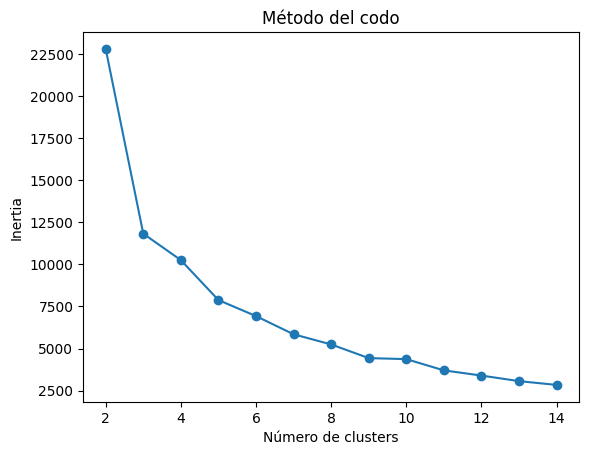

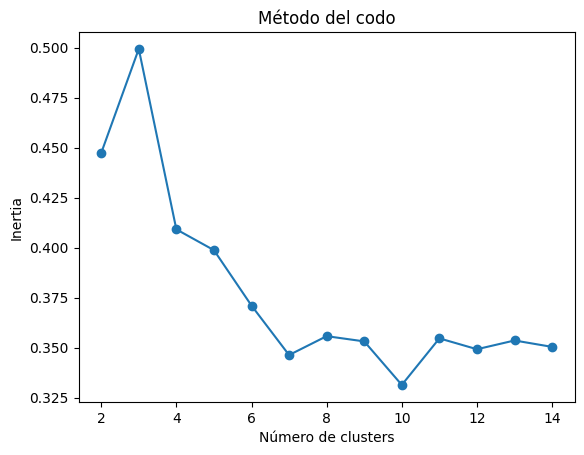

In [21]:
from sklearn.metrics import silhouette_score

ks = range(2, 15)           # lista de valores de K
inertias = []               # lista para almacenar inertia
silhouette = []             # lista para almacenar coeficiente silhouette

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_more_dev)
    inertias.append(model.inertia_)
    silhouette.append(silhouette_score(X_more_dev, model.labels_))

plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

plt.plot(ks, silhouette, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()



# 6. Conclusiones Generales:

1. **Impacto de la superposición de clusters en el Silhouette Score**:
   - En el primer paso, observamos que el Silhouette Score fue relativamente alto, lo que indica una buena separación entre clusters.
   - En el segundo paso, al agregar ruido manteniendo poca superposición entre clusters, el Silhouette Score probablemente se mantuvo alto o disminuyó ligeramente, dependiendo de la cantidad y distribución del ruido agregado.
   
2. **Efecto de la variación de la desviación en los datos**:
   - En el tercer paso, al aumentar la desviación en la función `make_blobs`, esperamos que la dispersión entre clusters aumente, lo que podría reducir el Silhouette Score.
   
3. **Superposición de clusters y densidad en el Silhouette Score**:
   - En el cuarto paso, al generar dos subconjuntos de datos con diferentes densidades y entrenar un modelo K-Means con más de tres clusters, esperamos una mayor superposición entre clusters y una mayor complejidad en la separación de los clusters. Esto podría resultar en un Silhouette Score más bajo debido a la dificultad de distinguir los clusters en áreas densamente pobladas y superpuestas.

4. **Interpretación general del Silhouette Score**:
   - En general, un Silhouette Score cercano a 1 indica una buena separación entre clusters, mientras que un valor cercano a 0 indica superposición de clusters y valores negativos indican que los puntos podrían haber sido asignados incorrectamente a los clusters.
   - La métrica Silhouette nos proporciona una medida cuantitativa de la cohesión y separación de los clusters, lo que nos permite evaluar la calidad de la agrupación en nuestros datos.
